**Question 4**

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

# Part 1

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1BZCk7WAz9WHz6mcIl1Ru8BIL9Yk86Q1Q
# https://drive.google.com/file/d/1BZCk7WAz9WHz6mcIl1Ru8BIL9Yk86Q1Q/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1BZCk7WAz9WHz6mcIl1Ru8BIL9Yk86Q1Q
To: /content/data.csv
100% 527k/527k [00:00<00:00, 5.56MB/s]


In [ ]:
# Load the dataset from the specified file path
df = pd.read_csv("/content/data.csv")

# Display the first few rows of the DataFrame
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## Information about the DataFrame

In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## Display the number of data that are NaN for each column

In [ ]:
df.isnull().sum()

# Remove rows with any null values
# df.dropna(inplace=True)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## Drop some columns from the DataFrame


In [ ]:
# Drop the country and street and statezip columns from the DataFrame
df = df.drop(['statezip', 'country', 'street'], axis=1)

In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  city           4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB


In [ ]:
# Extract the "City" column
City = df["city"]

# Count the occurrences of each unique city
City.value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

# Part 2

## Correlation matrix

In [ ]:
# Calculate the correlation between columns and 'price', then sort them in descending order
correlation_matrix = df.corr()['price'].sort_values(ascending=False)
correlation_matrix

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

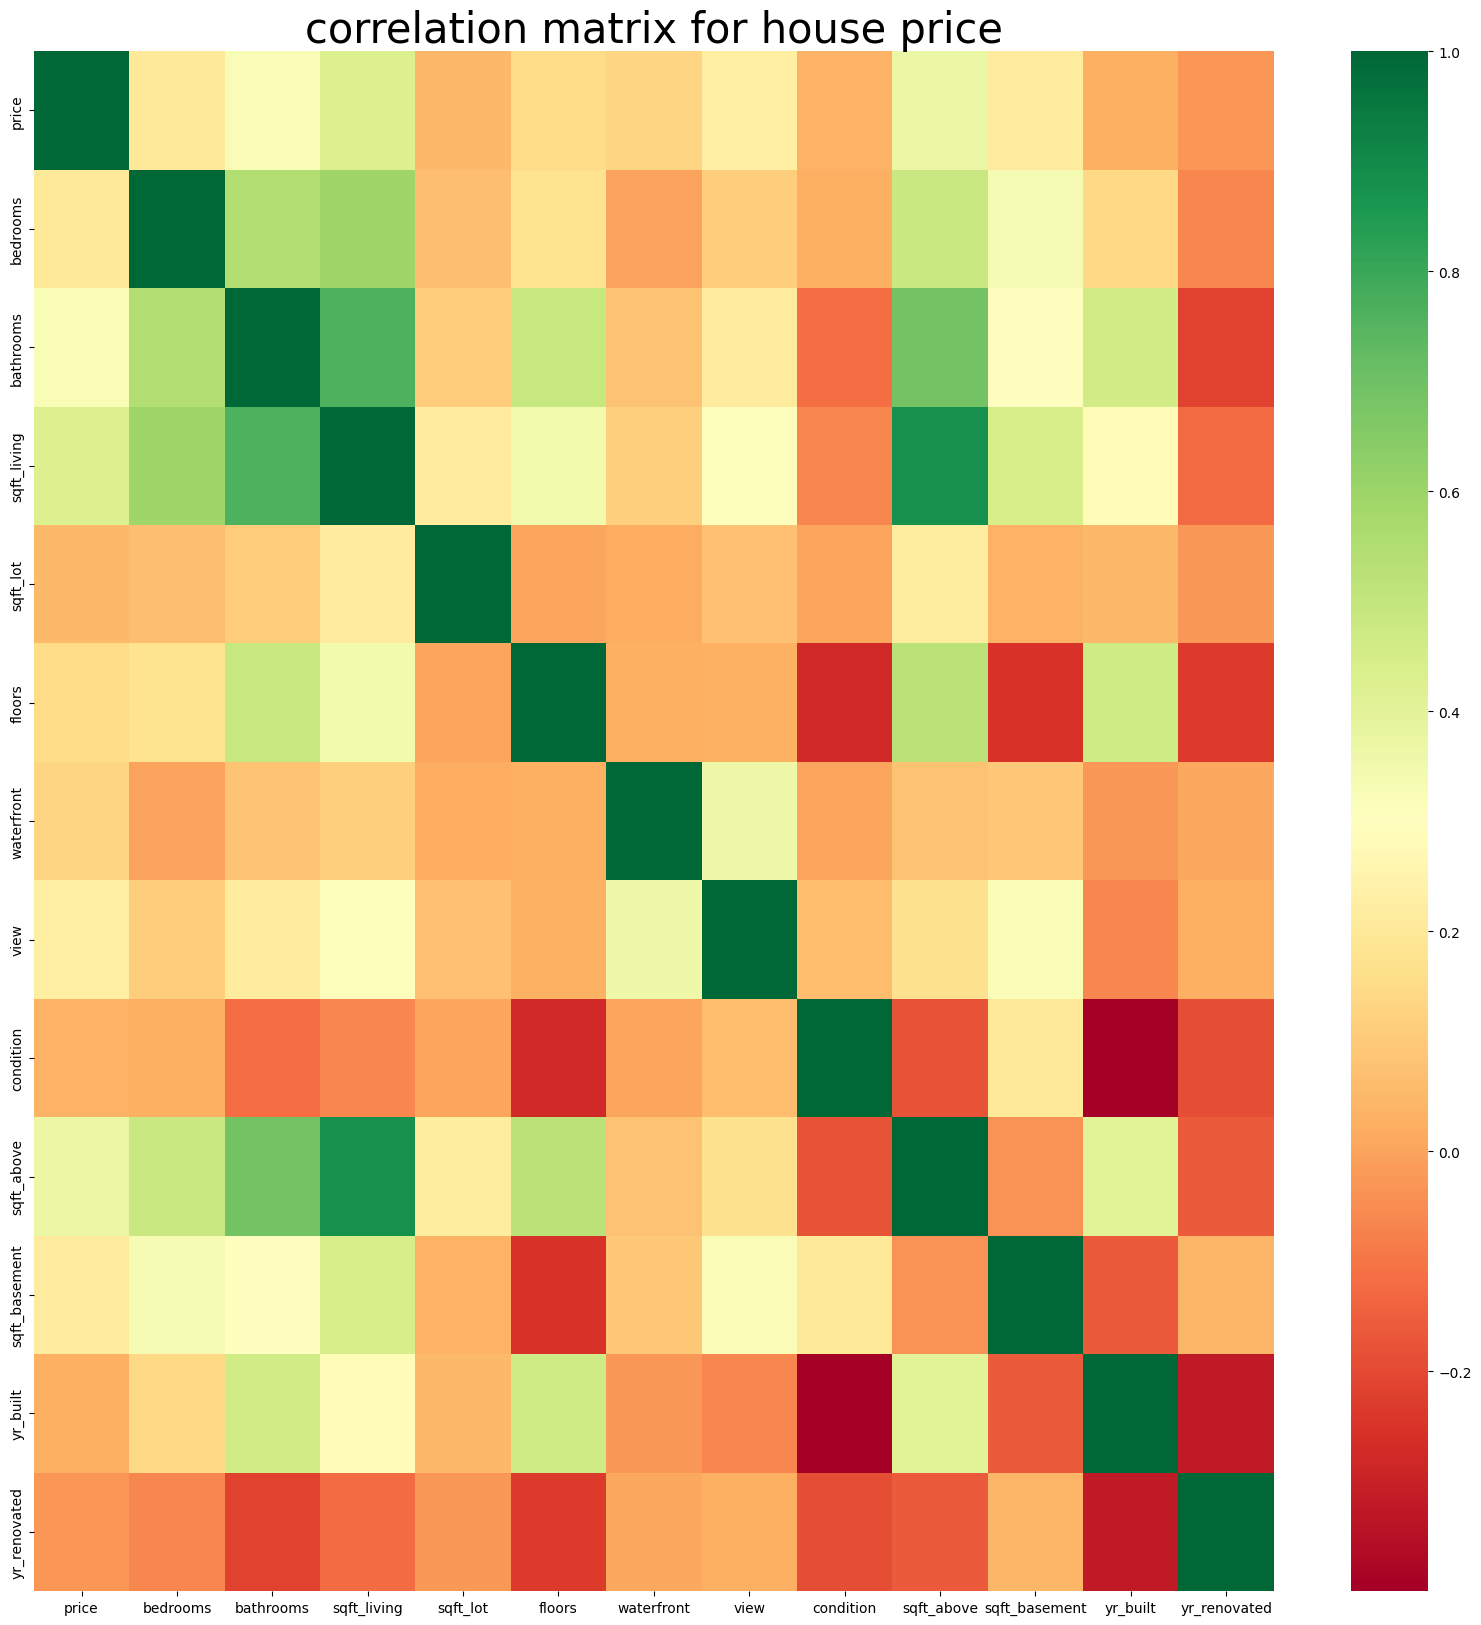

In [ ]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap="RdYlGn")
plt.title("correlation matrix for house price", fontsize=30)
plt.show()

In [ ]:
# Select columns with numerical data types
num = df.select_dtypes(exclude=['object']).columns
num

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

Text(0.5, 1.0, 'correlation matrix for house price')

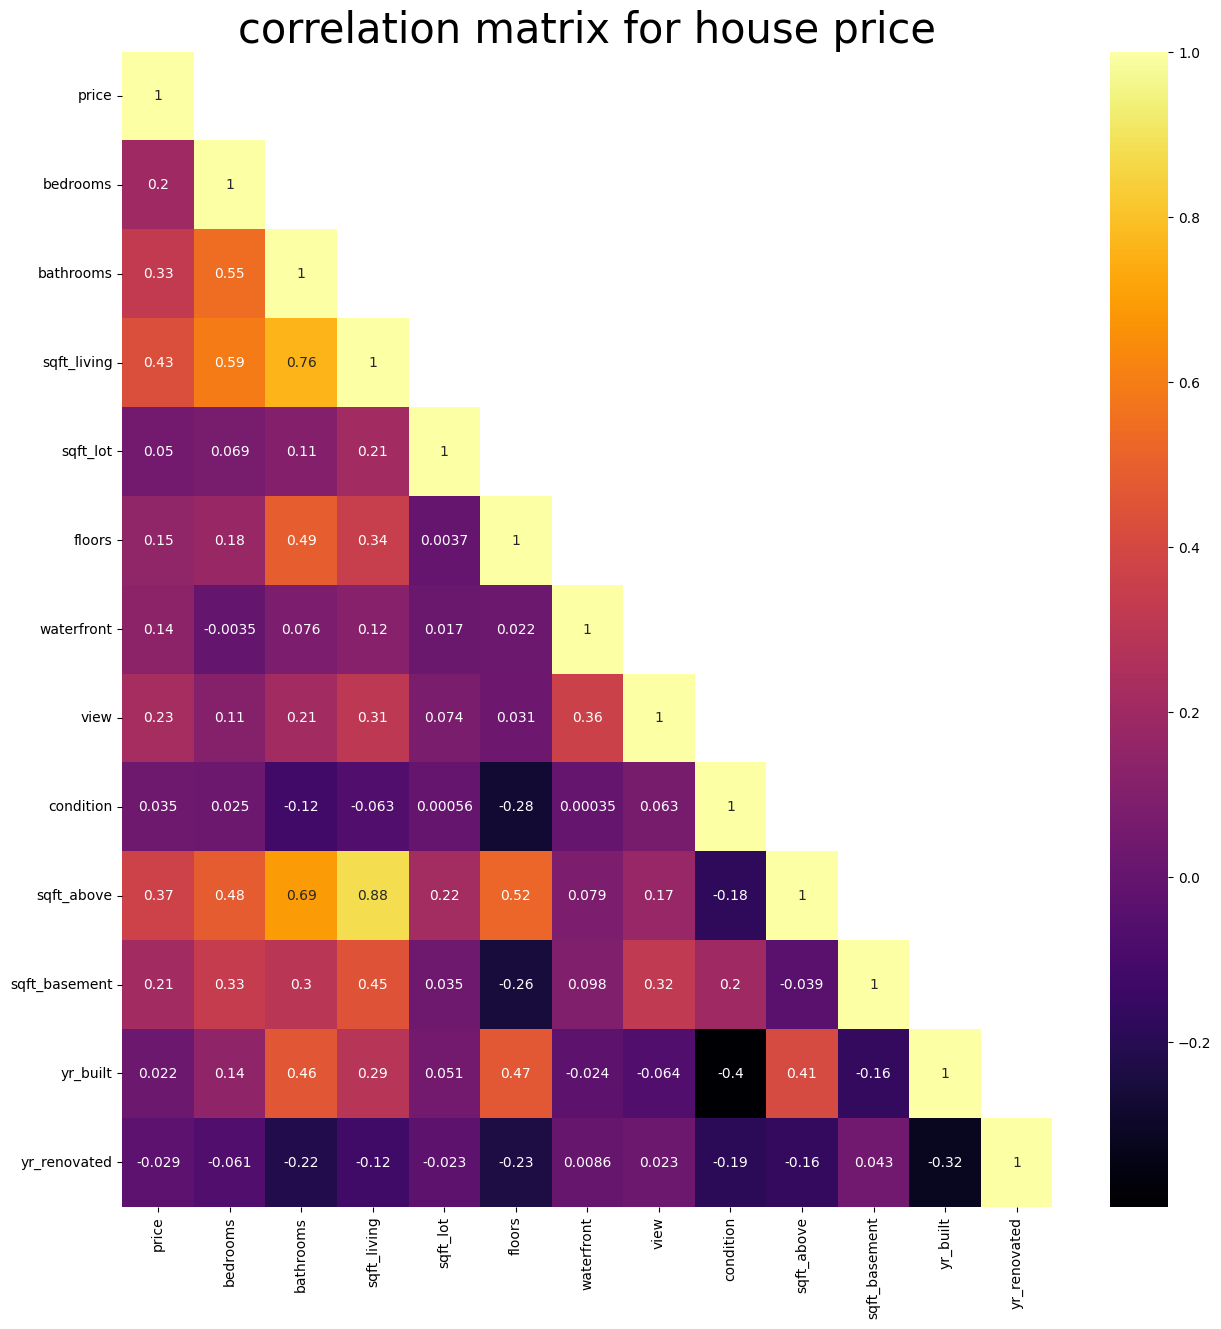

In [ ]:
# Create a heatmap to visualize the correlation matrix of numerical columns
plt.figure(figsize=(15, 15))
sns.heatmap(df[num].corr(), annot=True, cmap='inferno', mask=np.triu(df[num].corr(), k=1))
plt.title("correlation matrix for house price", fontsize=30)

# Part 3

## Plot Distribution and sqft_living

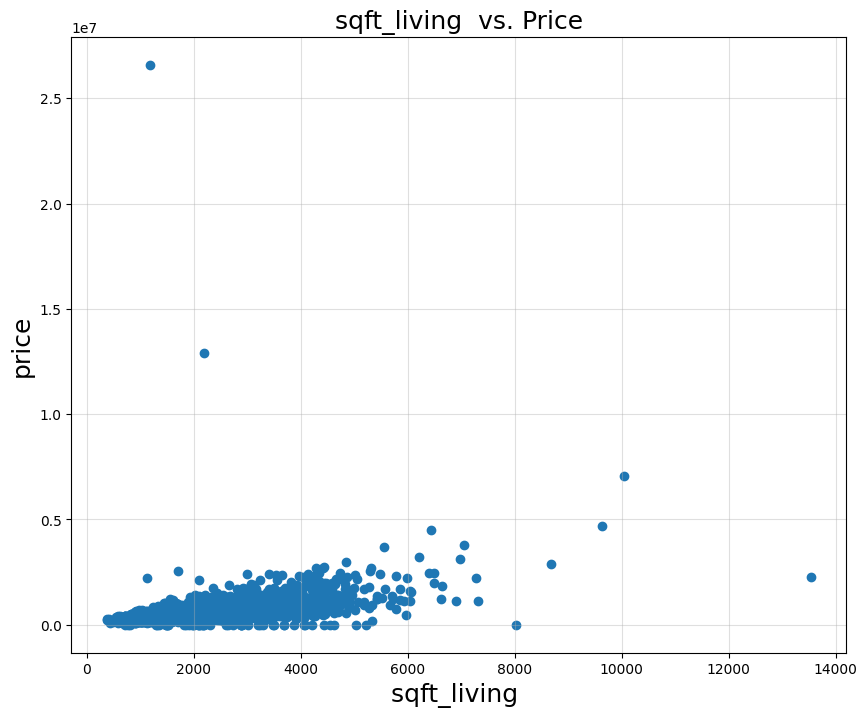

In [ ]:
# Create a scatter plot of  against price
plt.figure(figsize=(10, 8))
plt.scatter(x='sqft_living', y='price', data=df)
plt.xlabel('sqft_living ', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.title('sqft_living  vs. Price', fontsize=18)
plt.grid(alpha=0.4)
plt.show()

## Distribution of Price

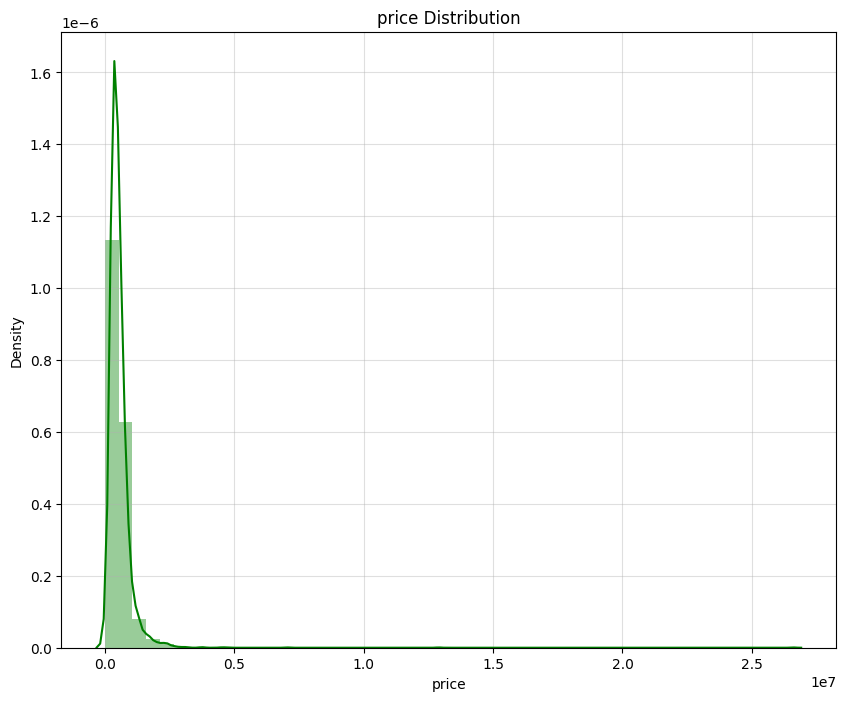

In [ ]:
plt.figure(figsize=(10, 8))

sns.distplot(df['price'], color="green").set_title('price Distribution')
plt.grid(alpha=0.4)

# Part 4

In [ ]:
# Extract 'year', 'month', and 'day' from the 'date' column
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month

# Show the DataFrame with the separate 'year' and 'month' columns
df = df[['year', 'month'] + [col for col in df.columns if col not in ['year', 'month']]]

# Drop the specified columns from the DataFrame
df = df.drop(['date'], axis=1)
df

,year,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,2014,5,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2014,5,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,2014,5,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,2014,5,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,2014,5,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014,7,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,2014,7,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,2014,7,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,2014,7,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


In [ ]:
# Drop year columns from the DataFrame
df = df.drop(['year'], axis=1)
df

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,5,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,5,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,5,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,5,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,5,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4596,7,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4597,7,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4598,7,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


## Convert descriptive data to numerical data

In [ ]:
# List of specified categorical columns
dummy = ['city']

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df2 = pd.get_dummies(df, columns=dummy, drop_first=True)

# Display the first few rows of the modified DataFrame
df2.head()

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,5,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,5,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,5,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,5,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,5,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Initialize LabelEncoder
l1 = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = l1.fit_transform(df2[i])

df2

,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,5,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,5,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,5,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,5,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,5,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,0,1,0,0,0,0,0,0,0,0
4596,7,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4597,7,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4598,7,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,0,1,0,0,0,0,0,0,0,0


# Part 5

In [ ]:
# Separate features (X) and output (Y) data
X = df2.drop(["price"], axis=1)  # features
y = df2["price"]                  # Output data

In [ ]:
# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93, shuffle=True)

# Display the dimensions of the training and testing sets
print(f'Dimensions of the training features: {X_train.shape}')
print(f'Dimensions of the training target: {y_train.shape}')
print(f'Dimensions of the testing features: {X_test.shape}')
print(f'Dimensions of the testing target: {y_test.shape}')

Dimensions of the training features: (3680, 56)
Dimensions of the training target: (3680,)
Dimensions of the testing features: (920, 56)
Dimensions of the testing target: (920,)


## Min_Max Scalar

In [ ]:
# Initialize Min-Max Scaler
scaler_1 = MinMaxScaler()

# Normalize the training input data
X_train = scaler_1.fit_transform(X_train)

# Normalize the test input data
X_test = scaler_1.transform(X_test)

In [ ]:
# Convert y_train and y_test type to DataFrame
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

scaler_2 = MinMaxScaler()

# Normalize outputs
y_train = scaler_2.fit_transform(y_train)
y_test = scaler_2.transform(y_test)

# Part 6

## MLP with 3 hidden layer

In [ ]:
model_3 = Sequential()

# Add the first hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))

# Add the second hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu'))

# Add the third hidden layer with 10 neurons and ReLU activation function
model_3.add(Dense(10, activation='relu'))

# Add an output layer with 1 neuron and linear activation function
model_3.add(Dense(1, activation='linear'))

model_3.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_139 (Dense)           (None, 10)                570       
                                                                 
 dense_140 (Dense)           (None, 10)                110       
                                                                 
 dense_141 (Dense)           (None, 10)                110       
                                                                 
 dense_142 (Dense)           (None, 1)                 11        
                                                                 
Total params: 801 (3.13 KB)
Trainable params: 801 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Fit model_3

In [ ]:
model_3.compile(optimizer='adam', loss='mse')

# Split the data into training and validation sets
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=93, shuffle=True)

history = model_3.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=10, verbose=0)

In [ ]:
# Evaluate the model
loss = model_3.evaluate(X_test , y_test)

29/29 [==============================] - 0s 1ms/step - loss: 9.0906e-05


In [ ]:
# Predictions on training and validation data
y_pred_3_train = model_3.predict(X_train1)
y_pred_3_val = model_3.predict(X_val)

# Calculate R2 score for training and validation data
rscore_train = r2_score(y_train1, y_pred_3_train)
rscore_val = r2_score(y_val, y_pred_3_val)

# Calculate R2 score for testing data
y_pred_3_test = model_3.predict(X_test)
rscore_3 = r2_score(y_test , y_pred_3_test)

print(f"Test R2score: {rscore_3}")
print(f"Train R2score: {rscore_train}")
print(f"Validation R2score: {rscore_val}")

29/29 [==============================] - 0s 1ms/step
Test R2score: 0.6380771480187429
Train R2score: 0.35001078758643345
Validation R2score: 0.4116297511019831


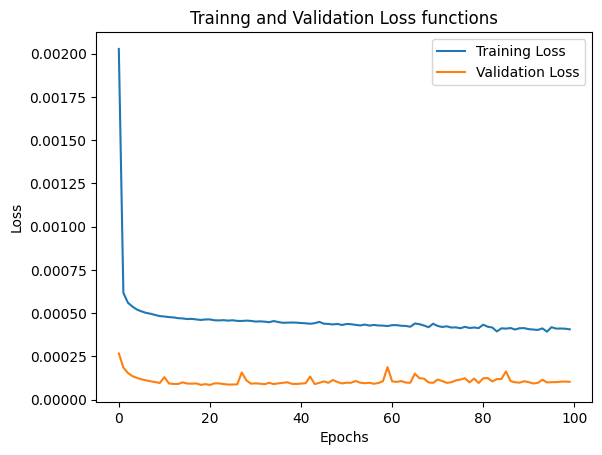

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Trainng and Validation Loss functions")
plt.show()

# Part 7

## SGD + MAE

In [ ]:
# Compile model with stochastic gradient descent optimizer and mean absolute error loss
model_3.compile(optimizer = 'sgd',loss = 'mae')

# Split the data into training and validation sets
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=93, shuffle=True)

history = model_3.fit(X_train1, y_train1, validation_data=(X_val, y_val), epochs=100, batch_size=10, verbose=0)

# Evaluate the model
loss = model_3.evaluate(X_test , y_test)

29/29 [==============================] - 0s 1ms/step - loss: 0.0044


In [ ]:
# Predictions on training and validation data
y_pred_3_train = model_3.predict(X_train1)
y_pred_3_val = model_3.predict(X_val)

# Calculate R2 score for training and validation data
rscore_train = r2_score(y_train1, y_pred_3_train)
rscore_val = r2_score(y_val, y_pred_3_val)

# Calculate R2 score for testing data
y_pred_3_test = model_3.predict(X_test)
rscore_3 = r2_score(y_test , y_pred_3_test)

print(f"Test R2score: {rscore_3}")
print(f"Train R2score: {rscore_train}")
print(f"Validation R2score: {rscore_val}")

29/29 [==============================] - 0s 1ms/step
Test R2score: 0.7025022605110858
Train R2score: 0.29695997451786105
Validation R2score: 0.34460826808219724


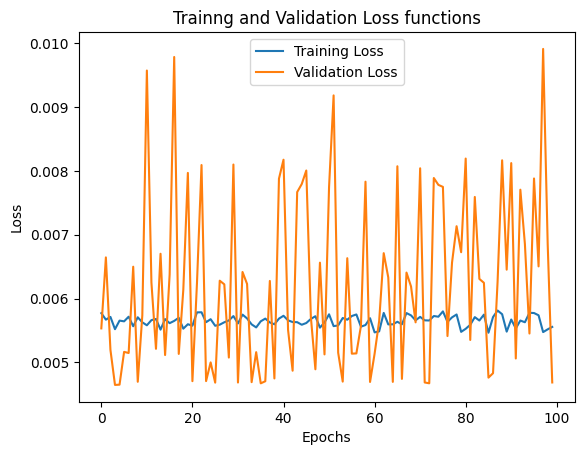

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Trainng and Validation Loss functions")
plt.show()

# Part 8

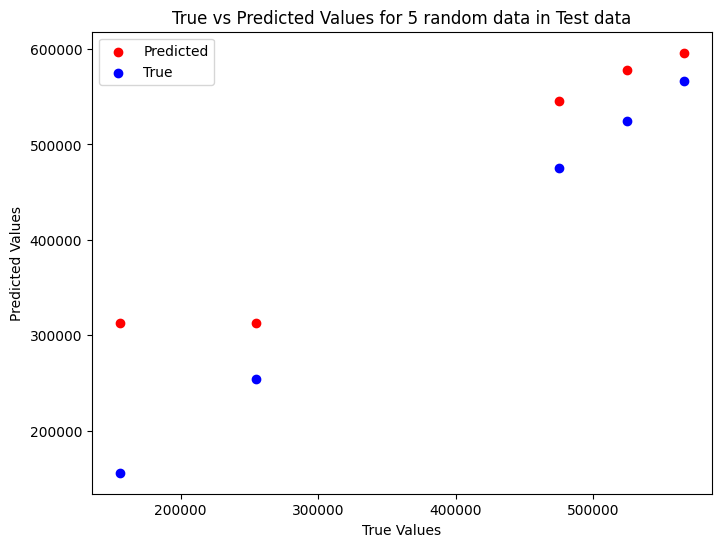

In [ ]:
# Inverse transform the scaled test data and predictions
y_test_unscaled = scaler_2.inverse_transform(y_test)
y_pred_unscaled = scaler_2.inverse_transform(y_pred_3_test)

random_pred = []
random_test = []

for i in range(5):
  j = random.randint(0, len(y_test_unscaled))
  random_pred.append(y_pred_unscaled[i])
  random_test.append(y_test_unscaled[i])

# Plotting the unscaled true test data against predictions with different colors
plt.figure(figsize=(8, 6))
plt.scatter(random_test, random_pred, color='red', label='Predicted')
plt.scatter(random_test, random_test, color='blue', label='True')
plt.title('True vs Predicted Values for 5 random data in Test data')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

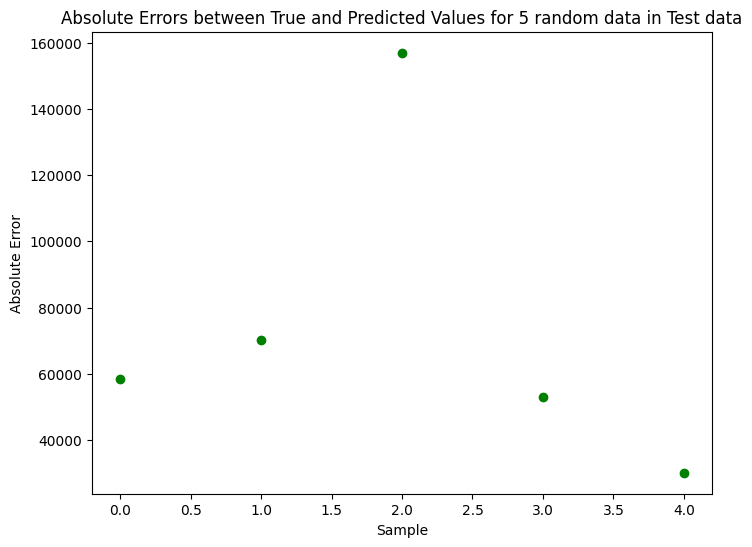

In [ ]:
# Assuming random_test and random_pred are lists
random_test = np.array(random_test)
random_pred = np.array(random_pred)

# Calculate errors between true and predicted values
errors = np.abs(random_test - random_pred)

# Plotting the errors
plt.figure(figsize=(8, 6))
plt.plot(errors, marker='o', linestyle='', color='green')
plt.title('Absolute Errors between True and Predicted Values for 5 random data in Test data')
plt.xlabel('Sample')
plt.ylabel('Absolute Error')
plt.show()

In [ ]:
print("True values:")
print(random_test)
print("\nPredicted values:")
print(random_pred)

True values:
[[254600.]
 [475000.]
 [156000.]
 [525000.]
 [566000.]]

Predicted values:
[[313017.22]
 [545077.56]
 [313017.22]
 [577813.25]
 [596068.56]]


## Improving Model

### MLP with 3 hidden layer

In [ ]:
model_3 = Sequential()

# Add a hidden layer with 10 neurons, ReLU activation function
model_3.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))

# Add the second hidden layer with 10 neurons, ReLU activation function
model_3.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))

# Add the third hidden layer with 10 neurons, ReLU activation function
model_3.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))

# Add an output layer with 1 neuron and linear activation function
model_3.add(Dense(1, activation='linear'))

model_3.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_175 (Dense)           (None, 10)                45810     
                                                                 
 dense_176 (Dense)           (None, 10)                110       
                                                                 
 dense_177 (Dense)           (None, 10)                110       
                                                                 
 dense_178 (Dense)           (None, 1)                 11        
                                                                 
Total params: 46041 (179.85 KB)
Trainable params: 46041 (179.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Model compilation
model_3.compile(optimizer='sgd', loss='mae')

# Define a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Training with callbacks
history = model_3.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=10, callbacks=[checkpoint])
# callbacks=[reduce_lr, early_stop, lr_scheduler, checkpoint]
# Evaluate the model
loss = model_3.evaluate(X_test , y_test)

Epoch 1/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0103 - val_loss: 0.0083
Epoch 2/100
295/295 [==============================] - 1s 2ms/step - loss: 0.0092 - val_loss: 0.0078
Epoch 3/100
295/295 [==============================] - 1s 2ms/step - loss: 0.0088 - val_loss: 0.0076
Epoch 4/100
295/295 [==============================] - 1s 2ms/step - loss: 0.0083 - val_loss: 0.0104
Epoch 5/100
295/295 [==============================] - 1s 2ms/step - loss: 0.0080 - val_loss: 0.0180
Epoch 6/100
295/295 [==============================] - 1s 2ms/step - loss: 0.0078 - val_loss: 0.0098
Epoch 7/100
295/295 [==============================] - 1s 2ms/step - loss: 0.0078 - val_loss: 0.0081
Epoch 8/100
295/295 [==============================] - 1s 2ms/step - loss: 0.0075 - val_loss: 0.0103
Epoch 9/100
295/295 [==============================] - 1s 2ms/step - loss: 0.0075 - val_loss: 0.0089
Epoch 10/100
295/295 [==============================] - 1s 3ms/step - loss: 0.0072 - val_lo

In [ ]:
# Predictions on training and validation data
y_pred_3_train = model_3.predict(X_train)
y_pred_3_val = model_3.predict(X_val)

# Calculate R2 score for training and validation data
rscore_train = r2_score(y_train, y_pred_3_train)
rscore_val = r2_score(y_val, y_pred_3_val)

# Calculate R2 score for testing data
y_pred_3_test = model_3.predict(X_test)
rscore_3 = r2_score(y_test , y_pred_3_test)

print(f"Test R2score: {rscore_3}")
print(f"Train R2score: {rscore_train}")
print(f"Validation R2score: {rscore_val}")

29/29 [==============================] - 0s 2ms/step
Test R2score: 0.6200287290955471
Train R2score: 0.22559344440814388
Validation R2score: 0.19966495086436797


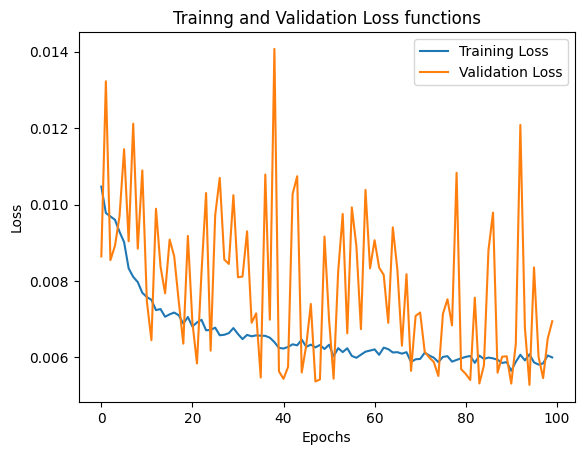

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')   # Training loss
plt.plot(history.history['val_loss'], label='val')  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Trainng and Validation Loss functions")
plt.show()